# Loading Python packages

The packages have pre-written code to complete a wide range of tasks.

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Downloading and loading data into Python

In [ ]:
!wget "https://raw.githubusercontent.com/titoghose/CAIPM_SS_ML/master/cardiovascular_diseases_dv3.csv"

In [2]:
cardio_data = pd.read_csv('cardiovascular_diseases_dv3.csv')
cardio_data.rename(columns={'AP_HIGH':'SYSTOLIC', 'AP_LOW':'DIASTOLIC'}, inplace=True)
label = 'CARDIO_DISEASE'
variables = cardio_data.columns.to_list()[:-1]
cardio_data.head()

,AGE,GENDER,HEIGHT,WEIGHT,SYSTOLIC,DIASTOLIC,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


# Visualising data

Visualising your data before fitting models to it can be quite insightful, as
compared to just blindly fitting a model to the data and obtaining an accuracy
score. 

Some plot options include:
1. Scatter plots 
2. Violin/strip/box plots 
3. Distribution/histogram/KDE plots 

Some more advanced visualisation methods which let you see the effect of
multiplt variables at once include:
1. Principal component analysis (PCA)
2. t-SNE 
3. U-MAP 

For the purpose of this workshop, we will be using the Python packages called
[seaborn](http://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/),
which makes life easier.

## Scatter, box and histogram plots for systolic blood pressure

<AxesSubplot:xlabel='SYSTOLIC', ylabel='CARDIO_DISEASE'>

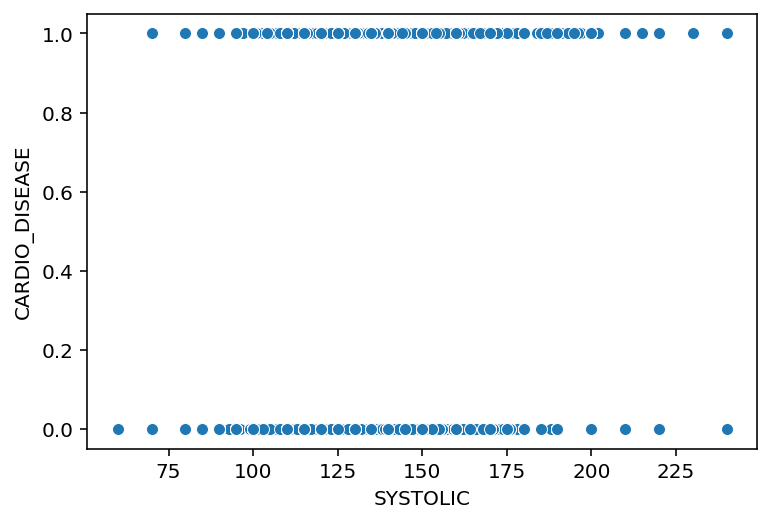

In [86]:
# 1. Scatter
sns.scatterplot(data=cardio_data, x='SYSTOLIC', y='CARDIO_DISEASE')

# 2. Violin
# sns.boxplot(data=cardio_data, x='CARDIO_DISEASE', y='SYSTOLIC')

# If we have a variable that we want to visualise, and the samples or
# readings for that variable come from various groups, seaborn has an
# option called 'hue' which internally splits the data into these groups
# and plots them in different colors. This is very helpful when we want
# to view the distribution of, let's say, systolic blood pressure
# between those with and without cadiovascular diseases.

# 3. Histogram
# sns.histplot(data=cardio_data, x='SYSTOLIC', hue='CARDIO_DISEASE',
# stat='probability')

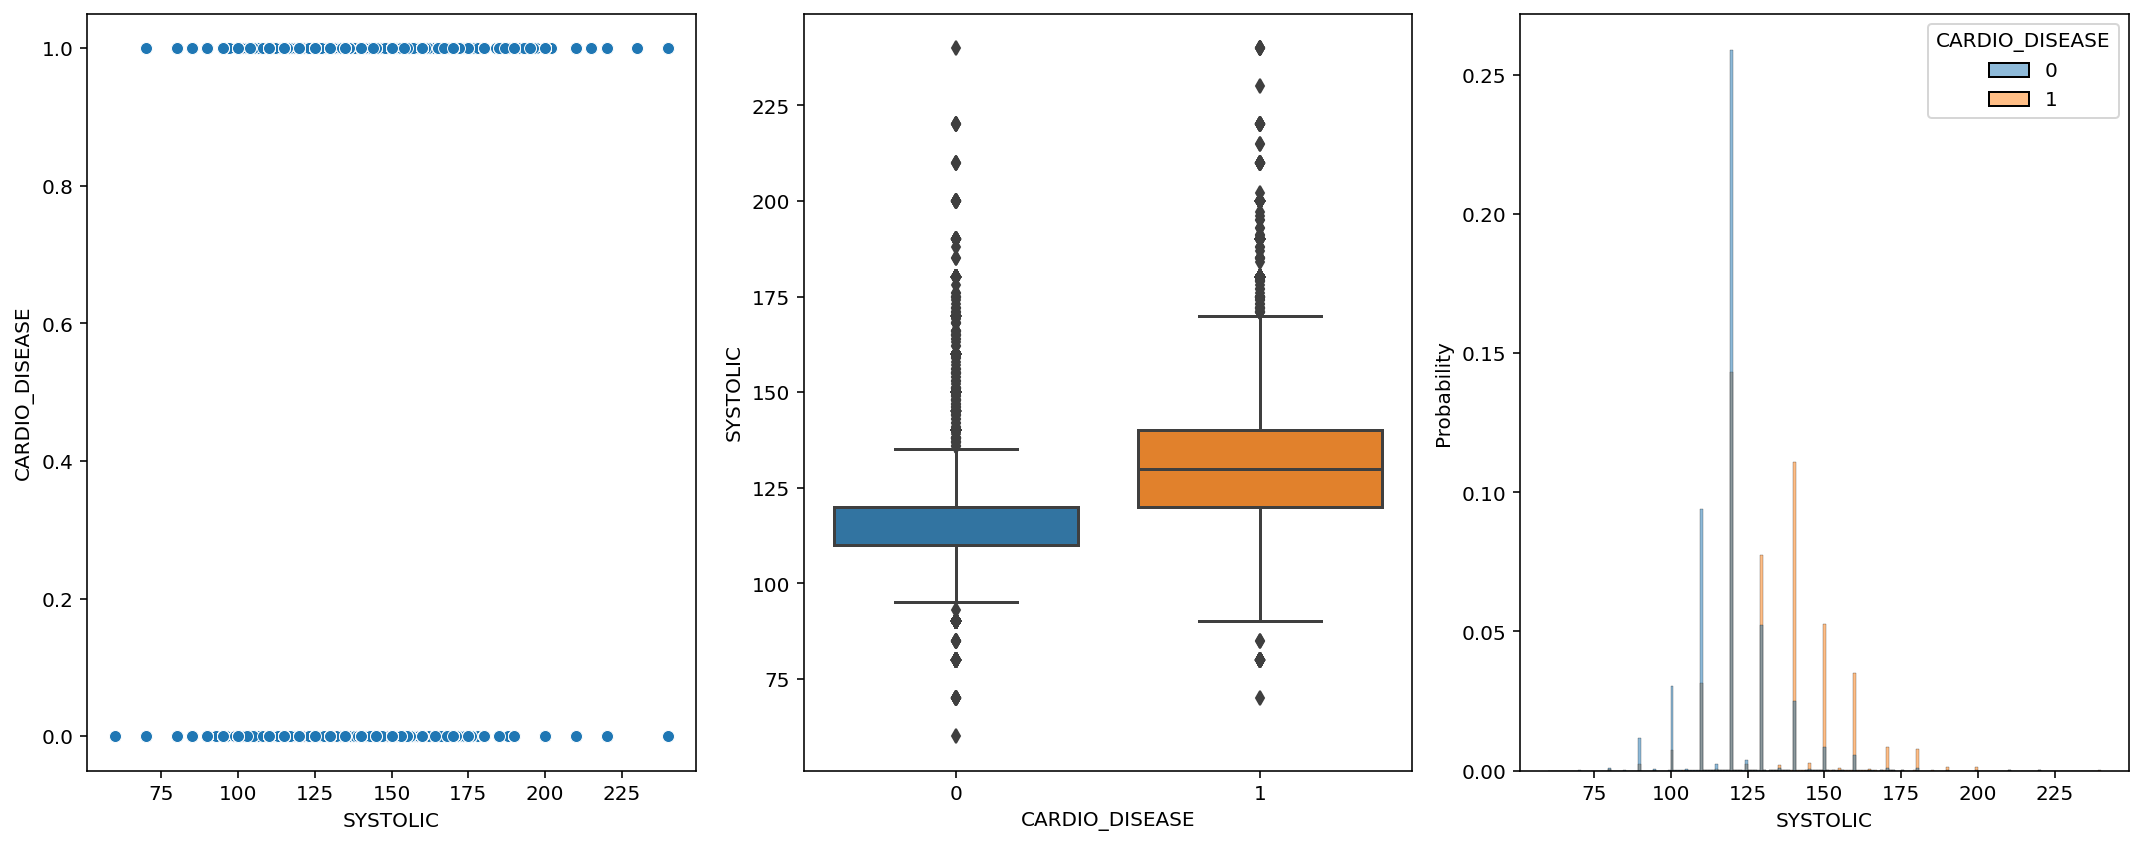

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax = ax.flatten()
sns.scatterplot(data=cardio_data, x='SYSTOLIC', y='CARDIO_DISEASE', ax=ax[0])
sns.boxplot(data=cardio_data, x='CARDIO_DISEASE', y='SYSTOLIC', ax=ax[1])
sns.histplot(data=cardio_data, x='SYSTOLIC', hue='CARDIO_DISEASE', stat='probability', ax=ax[2])
plt.tight_layout()


## Exercise 1.

Generate a scatterplot, boxplot and histogram plot to understand the
relationship between BMI and cardiovascular disease.

**HINT:** 

BMI = (weight in kg)/(height in m)^2

In the data, you have weight in kg, and height in cm (1m = 100cm). 

In Python, to calculate c = a/b^2, we would write something like this: c = a/

In [ ]:
bmi = # Add your code here
cardio_data.insert(4, 'BMI', bmi)

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax = ax.flatten()
# Scatter plot function
# Box plot function
# Histogram plot function
plt.tight_layout()

Do you spot anything weird in the data? Any values look really odd and out of
range? 

Anything weird in these plots:

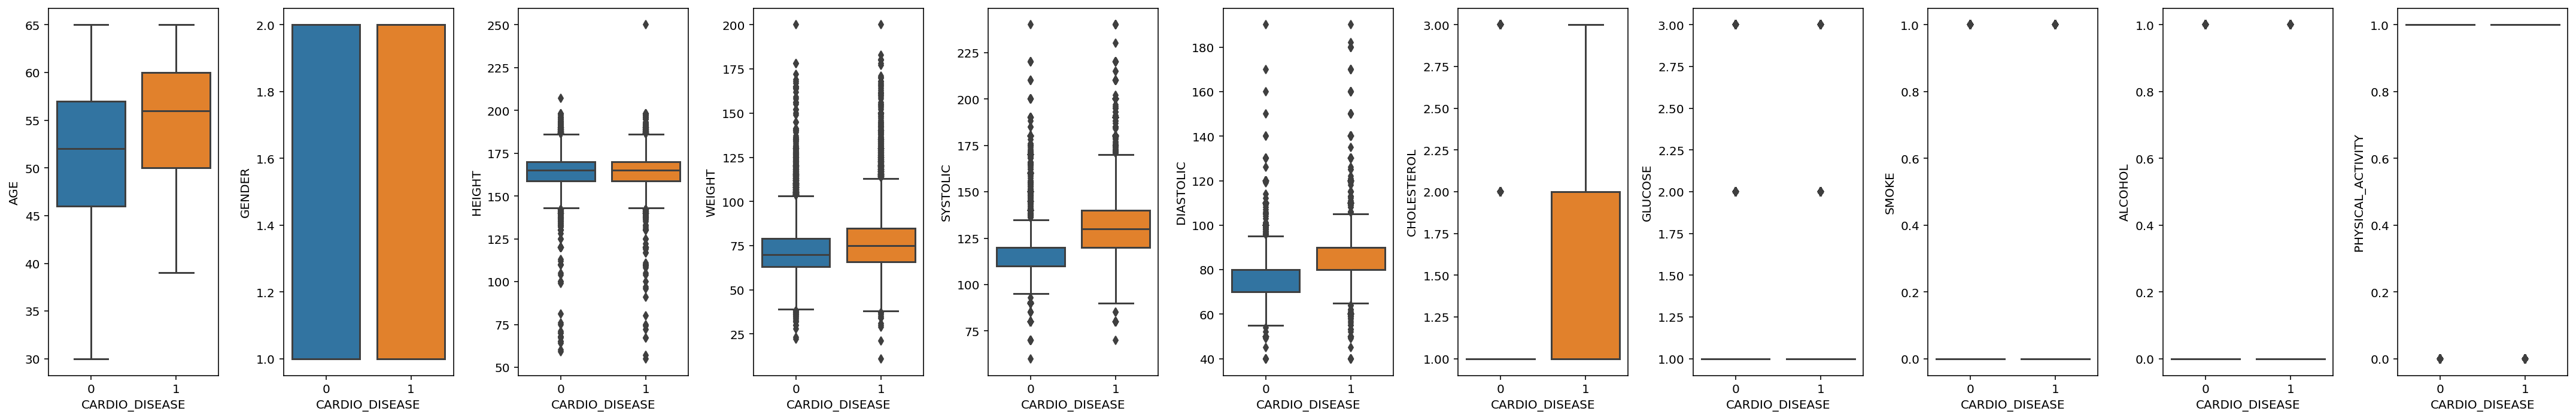

In [85]:
fig, ax = plt.subplots(1, len(cardio_data.columns)-1, figsize=(30, 5))
ax = ax.flatten()
for ci, c in enumerate(cardio_data.columns[:-1]):
    sns.boxplot(data=cardio_data, x='CARDIO_DISEASE', y=c, ax=ax[ci])
plt.tight_layout()

# Remove outlier points to clean up the data

Sometimes outlier points may be legitimate data points while others may be a
mistake in data entry, or something similar.

* From the above plots, a weight of 200kg may be possible, but it may be an entry
mistake. 
* However, multiple values of height <100cm would probably be
some sort of entry mistake. The shortest person in the world is 54cm, and the
average height of people having dwarfism is 122cm.

A simple way of removing outliers from data following a normal distribution is
to remove values which are greater than 3-4 standard deviations from the mean.

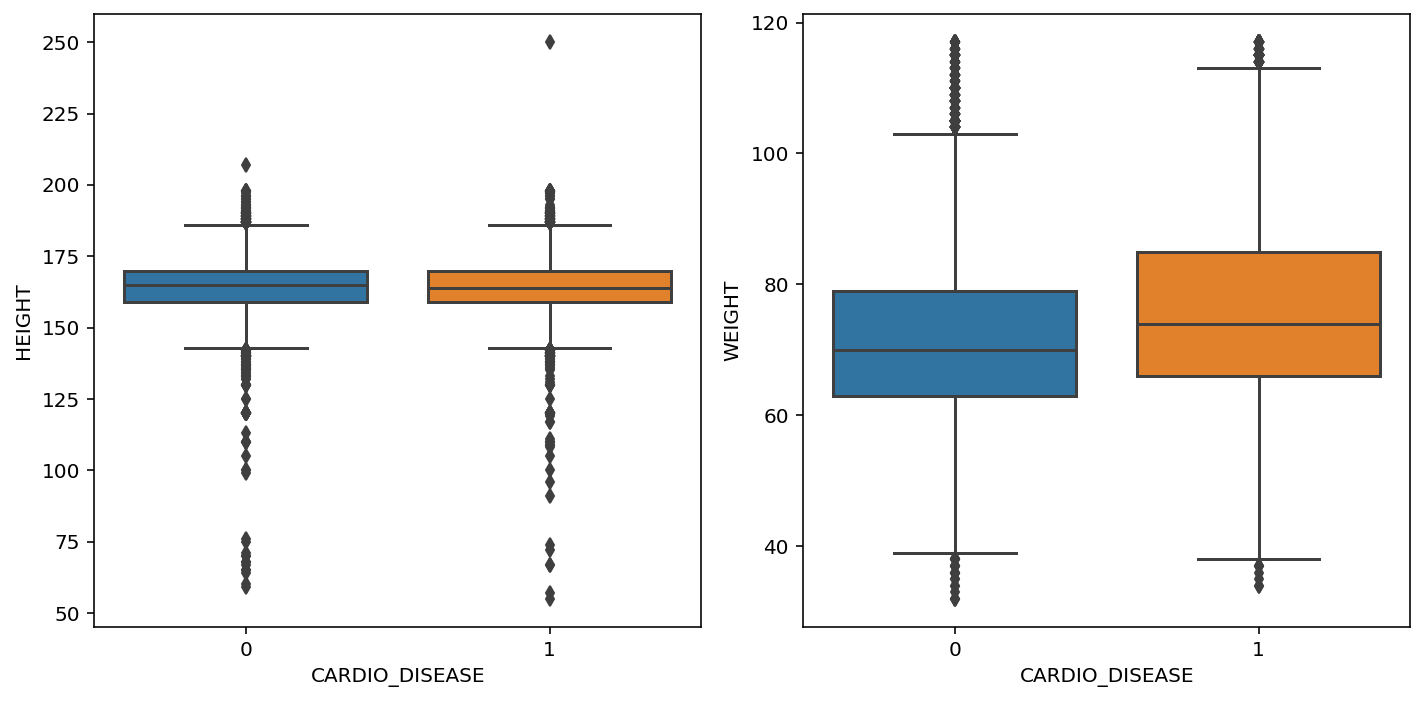

In [97]:
weight_zscores = stats.zscore(cardio_data['WEIGHT'])
cardio_data_filt = cardio_data.loc[np.abs(weight_zscores) < 3]
cardio_data_filt.shape
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.flatten()
for ci, c in enumerate(['HEIGHT', 'WEIGHT']):
    sns.boxplot(data=cardio_data_filt, x='CARDIO_DISEASE', y=c, ax=ax[ci])
plt.tight_layout()

## Exercise 2.

Removing outliers based on weight did not help much, because we got rid of some
people with possibly wrongly entered weight information, but the height outliers
still remain. 

A better way could be to remove outliers from the data based on BMI values, if
BMI > 3 SD. Do that and see if the data looks a little better.

**HINT:** 

You have already calculated BMI in the earlier exercise, so you can just use
that column from the data.

In [ ]:
'''
Your code to filter outliers based on BMI. 
Save the filtered data in a dataframe called "cardio_data_filt"
'''

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.flatten()
for ci, c in enumerate(['HEIGHT', 'WEIGHT']):
    sns.boxplot(data=cardio_data_filt, x='CARDIO_DISEASE', y=c, ax=ax[ci])
plt.tight_layout()

# Save the filtered data for the final analysis

In [100]:
print('Total number of people in the data: ', cardio_data_filt.shape[0])
print('Total number of variables in the data: ', cardio_data_filt.shape[1] - 1)
print('Total number of people with cardiovascular diseases: ', cardio_data_filt.loc[cardio_data_filt['CARDIO_DISEASE'] == 1].shape[0])

Total number of people in the data:  68112
Total number of variables in the data:  12
Total number of people with cardiovascular diseases:  33564


## Exercise 3.

Print the number of people who are healthy, i.e. without any cardiovacular diseases.

In [99]:
# Add your code to print the number of people without cardiovascular diseases

## Save the pandas dataframe as a CSV file

In [ ]:
cardio_data_filt.to_csv('Filtered_cardiovascular_disease.csv', index=False)